When talking about numerical features, preprocessing methods like standardization are a common requirement for estimators.

## What is scaling for?

So that all features have equal opportunity to influence on the model.

Or perhaps to make a feature more important by scaling (I will look into this further in other posts).

## When to use standardization?

- When comparing measurements that have **different units**.
- In models that calculate a distance between two data points in their computation, which means most of all except **tree-based models**.

## What models?

For example

- k-nearest neighbors with an Euclidean distance measure if you want **all features to contribute equally**.
- k-means (see k-nearest neighbors).
- Logistic regression, SVMs, perceptrons, neural networks etc. If you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others.
- Linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you’d emphasize variables on "larger measurement scales" more.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set_style("whitegrid")
# Bigger font
sns.set_context("poster")
# Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 3
np.random.seed(123)

In [2]:
from sklearn import preprocessing
X = {
    'x1':np.random.normal(-50,20,100),
    'x2':np.random.normal(10,60,100),
    'x3':np.random.exponential(20,100),
    'x4':np.concatenate((np.linspace(0,100,90), np.linspace(400,410,10)))
    }
df = pd.DataFrame(X)

# Standardization (or Z-score normalization)

A feature is rescaled so that it can have the properties of a **standard normal distribution**. $\mu = 0$ and $\sigma = 1$. The thing is that some estimators assume that all features are centered around zero and have variance of 1, so standardization does it.

$$
z = \frac{x - \mu}{\sigma}
$$

- If data is not normally distributed, this might not be the best scaler to use.
- It is the best scaler, in general.

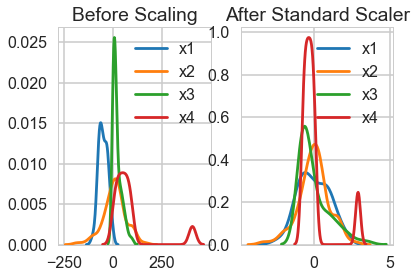

In [3]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns.values)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
sns.kdeplot(df['x4'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
sns.kdeplot(scaled_df['x4'], ax=ax2)
plt.show()

- The perfect scaling would be when there are features only like x1 and x2, which are gaussian.

- x3 looks good, but I think it should be not centered because it is Exponential, so it should give more weight to the values on the left.

- Regarding x4, it does a good job though we might want to avoid considering the outliers, and in that case "Robust Scaler" would do a better job. 

## Min-Max Scaler (or Normalization)

MaxAbsScaler: Min-Max scaling but makes data range within [-1, 1]

$$
X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}}
$$

- Use it when the standard scaler might not work so well.

- It is sensitive to outliers.

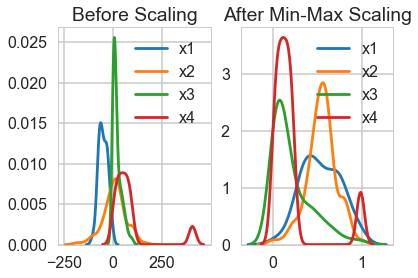

In [4]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns.values)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
sns.kdeplot(df['x4'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
sns.kdeplot(scaled_df['x4'], ax=ax2)
plt.show()

- This one gives a better x3
- x4 still considers the outliers

## Robust Scaler

$$
\dfrac{x_i – Q_1(x)}{Q_3(x) – Q_1(x)}
$$

This one is like the Min-Max scaler, but it instead uses the interquartile, range rather than the min-max, so that it is robust to outliers.

- It gives smaller standard deviations, which can suppress the effect of outliers.

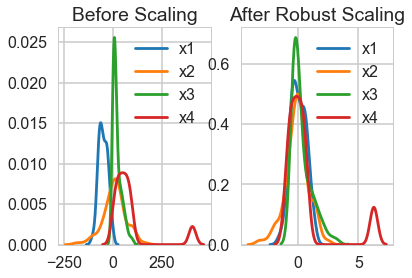

In [5]:
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(df)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=df.columns.values)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
sns.kdeplot(df['x4'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
sns.kdeplot(robust_scaled_df['x3'], ax=ax2)
sns.kdeplot(robust_scaled_df['x4'], ax=ax2)
plt.show()

- It did with x3 almost the same as when doing standardization.
- It didn't take into account the outliers.
- It lost most the data from x1.

This might explain why they treat outliers separately and mostly use standardization or min-max. One may use standardization most of the time because data is commonly Gaussian.